In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
flights=pd.read_csv('flights.csv')
flights=flights.sample(n=100000)
flights.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_16692\664831390.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights=pd.read_csv('flights.csv')


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
4219985,2015,9,20,7,DL,2425,N359NW,MSY,ATL,1415,...,1630.0,-18.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
64664,2015,1,5,1,MQ,2993,N610MQ,TVC,ORD,725,...,839.0,49.0,0,0,NaN,49.0,0.0,0.0,0.0,0.0
3394820,2015,7,31,5,AA,1133,N3MFAA,MIA,LGA,705,...,955.0,-7.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2014516,2015,5,8,5,DL,2621,N384DA,DTW,SFO,1739,...,1928.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5601214,2015,12,17,4,UA,222,N76505,SFO,LAX,2004,...,2123.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
flights.shape

(100000, 31)

In [4]:
flights.isnull().values.any()

True

In [5]:
flights.isnull().sum()

YEAR                       0
MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
FLIGHT_NUMBER              0
TAIL_NUMBER              275
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME          1554
DEPARTURE_DELAY         1554
TAXI_OUT                1599
WHEELS_OFF              1599
SCHEDULED_TIME             0
ELAPSED_TIME            1880
AIR_TIME                1880
DISTANCE                   0
WHEELS_ON               1658
TAXI_IN                 1658
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME            1658
ARRIVAL_DELAY           1880
DIVERTED                   0
CANCELLED                  0
CANCELLATION_REASON    98387
AIR_SYSTEM_DELAY       81620
SECURITY_DELAY         81620
AIRLINE_DELAY          81620
LATE_AIRCRAFT_DELAY    81620
WEATHER_DELAY          81620
dtype: int64

<Axes: xlabel='CANCELLATION_REASON', ylabel='count'>

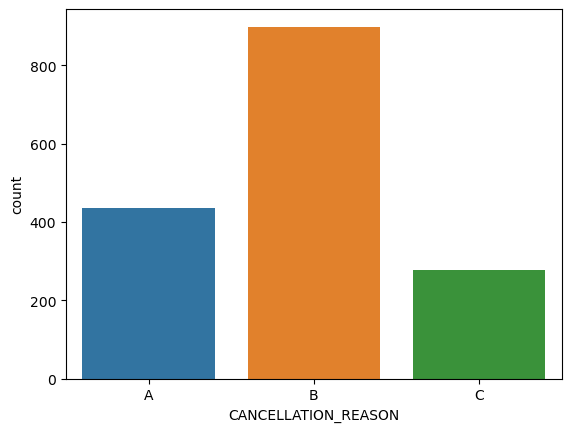

In [6]:
sns.countplot(x='CANCELLATION_REASON',data=flights)

<Axes: xlabel='MONTH', ylabel='count'>

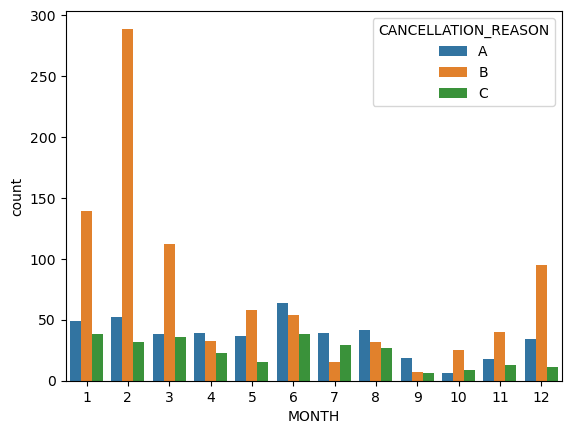

In [7]:
sns.countplot(x="MONTH",hue="CANCELLATION_REASON",data=flights)

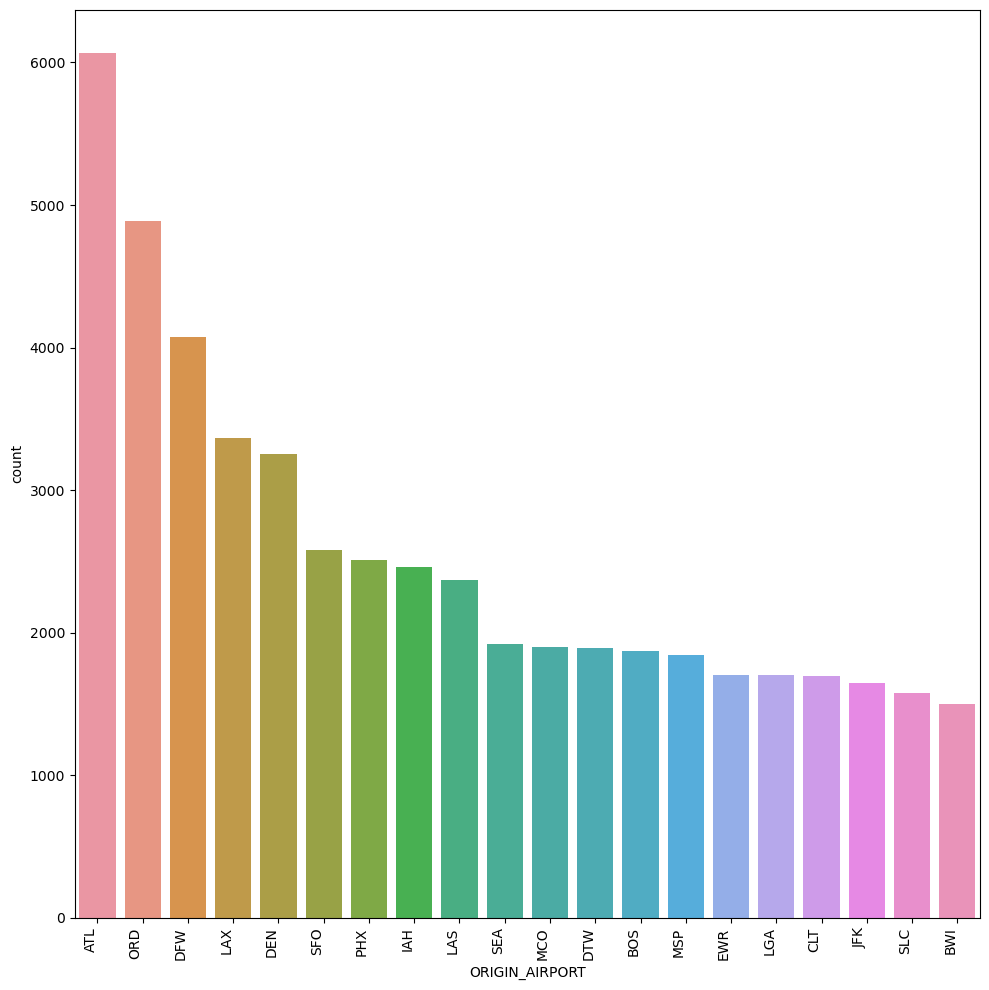

In [8]:
plt.figure(figsize=(10, 10))
axis = sns.countplot(x=flights['ORIGIN_AIRPORT'], data =flights, order=flights['ORIGIN_AIRPORT'].value_counts().iloc[:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

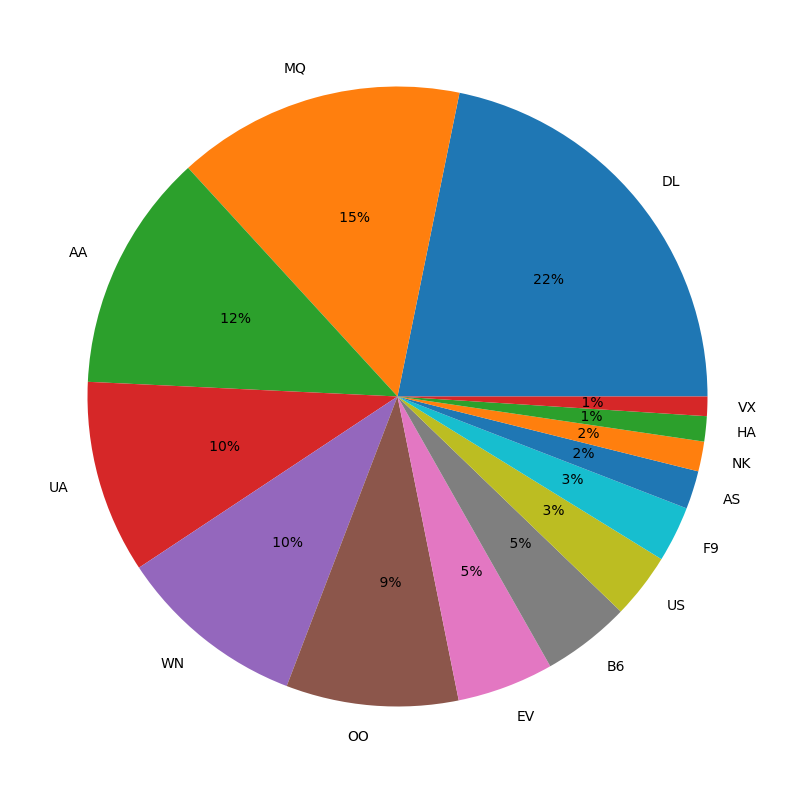

In [9]:
axis = plt.subplots(figsize=(10,14))
Name = flights["AIRLINE"].unique()
size = flights["AIRLINE"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.show()

In [10]:
variables_to_remove=["YEAR","FLIGHT_NUMBER","TAIL_NUMBER","DEPARTURE_TIME","TAXI_OUT","WHEELS_OFF","ELAPSED_TIME","AIR_TIME","WHEELS_ON","TAXI_IN","ARRIVAL_TIME","DIVERTED","CANCELLED","CANCELLATION_REASON","AIR_SYSTEM_DELAY", "SECURITY_DELAY","AIRLINE_DELAY","LATE_AIRCRAFT_DELAY","WEATHER_DELAY","SCHEDULED_TIME","SCHEDULED_ARRIVAL"]
flights.drop(variables_to_remove,axis=1,inplace= True)
flights.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'DISTANCE', 'ARRIVAL_DELAY'],
      dtype='object')

In [11]:
airport = pd.read_csv('airports.csv')
airport

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [12]:
flights.loc[~flights.ORIGIN_AIRPORT.isin(airport.IATA_CODE.values),'ORIGIN_AIRPORT']='OTHER'
flights.loc[~flights.DESTINATION_AIRPORT.isin(airport.IATA_CODE.values),'DESTINATION_AIRPORT']='OTHER'
flights

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
4219985,9,20,7,DL,MSY,ATL,1415,-6.0,425,-18.0
64664,1,5,1,MQ,TVC,ORD,725,-4.0,224,49.0
3394820,7,31,5,AA,MIA,LGA,705,1.0,1096,-7.0
2014516,5,8,5,DL,DTW,SFO,1739,-2.0,2079,-16.0
5601214,12,17,4,UA,SFO,LAX,2004,0.0,337,-17.0
...,...,...,...,...,...,...,...,...,...,...
711237,2,16,1,OO,LAX,SJC,2140,12.0,308,5.0
4720218,10,22,4,OO,OTHER,OTHER,705,-2.0,588,17.0
2946689,7,4,6,WN,MSP,MKE,1445,7.0,297,0.0
2696949,6,19,5,UA,SFO,DEN,1300,-5.0,967,4.0


In [13]:
print(flights.ORIGIN_AIRPORT.nunique())
print(flights.DESTINATION_AIRPORT.nunique())
print(flights.AIRLINE.nunique())
  

flights=flights.dropna()
flights

323
319
14


,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
4219985,9,20,7,DL,MSY,ATL,1415,-6.0,425,-18.0
64664,1,5,1,MQ,TVC,ORD,725,-4.0,224,49.0
3394820,7,31,5,AA,MIA,LGA,705,1.0,1096,-7.0
2014516,5,8,5,DL,DTW,SFO,1739,-2.0,2079,-16.0
5601214,12,17,4,UA,SFO,LAX,2004,0.0,337,-17.0
...,...,...,...,...,...,...,...,...,...,...
711237,2,16,1,OO,LAX,SJC,2140,12.0,308,5.0
4720218,10,22,4,OO,OTHER,OTHER,705,-2.0,588,17.0
2946689,7,4,6,WN,MSP,MKE,1445,7.0,297,0.0
2696949,6,19,5,UA,SFO,DEN,1300,-5.0,967,4.0


In [14]:
flights.shape

(98120, 10)

In [15]:
df=pd.DataFrame(flights)
df['DAY_OF_WEEK']= df['DAY_OF_WEEK'].apply(str)
df["DAY_OF_WEEK"].replace({"1":"SUNDAY", "2": "MONDAY", "3": "TUESDAY", "4":"WEDNESDAY", "5":"THURSDAY", "6":"FRIDAY", "7":"SATURDAY"},inplace=True)
flights

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
4219985,9,20,7,DL,MSY,ATL,1415,-6.0,425,-18.0
64664,1,5,1,MQ,TVC,ORD,725,-4.0,224,49.0
3394820,7,31,5,AA,MIA,LGA,705,1.0,1096,-7.0
2014516,5,8,5,DL,DTW,SFO,1739,-2.0,2079,-16.0
5601214,12,17,4,UA,SFO,LAX,2004,0.0,337,-17.0
...,...,...,...,...,...,...,...,...,...,...
711237,2,16,1,OO,LAX,SJC,2140,12.0,308,5.0
4720218,10,22,4,OO,OTHER,OTHER,705,-2.0,588,17.0
2946689,7,4,6,WN,MSP,MKE,1445,7.0,297,0.0
2696949,6,19,5,UA,SFO,DEN,1300,-5.0,967,4.0


In [16]:
dums = ['AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT','DAY_OF_WEEK']
df_cat=pd.get_dummies(df[dums],drop_first=True)
df_cat

,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
4219985,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
64664,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3394820,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2014516,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
5601214,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711237,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
4720218,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
2946689,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2696949,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [17]:
df_cat.columns

Index(['AIRLINE_AS', 'AIRLINE_B6', 'AIRLINE_DL', 'AIRLINE_EV', 'AIRLINE_F9',
       'AIRLINE_HA', 'AIRLINE_MQ', 'AIRLINE_NK', 'AIRLINE_OO', 'AIRLINE_UA',
       ...
       'DESTINATION_AIRPORT_WYS', 'DESTINATION_AIRPORT_XNA',
       'DESTINATION_AIRPORT_YAK', 'DESTINATION_AIRPORT_YUM',
       'DAY_OF_WEEK_MONDAY', 'DAY_OF_WEEK_SATURDAY', 'DAY_OF_WEEK_SUNDAY',
       'DAY_OF_WEEK_THURSDAY', 'DAY_OF_WEEK_TUESDAY', 'DAY_OF_WEEK_WEDNESDAY'],
      dtype='object', length=659)

In [18]:
var_to_remove=["DAY_OF_WEEK","AIRLINE","ORIGIN_AIRPORT","DESTINATION_AIRPORT"]
df.drop(var_to_remove,axis=1,inplace=True)
df

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
4219985,9,20,1415,-6.0,425,-18.0
64664,1,5,725,-4.0,224,49.0
3394820,7,31,705,1.0,1096,-7.0
2014516,5,8,1739,-2.0,2079,-16.0
5601214,12,17,2004,0.0,337,-17.0
...,...,...,...,...,...,...
711237,2,16,2140,12.0,308,5.0
4720218,10,22,705,-2.0,588,17.0
2946689,7,4,1445,7.0,297,0.0
2696949,6,19,1300,-5.0,967,4.0


In [19]:
data=pd.concat([df,df_cat],axis=1)
data

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
4219985,9,20,1415,-6.0,425,-18.0,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
64664,1,5,725,-4.0,224,49.0,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3394820,7,31,705,1.0,1096,-7.0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2014516,5,8,1739,-2.0,2079,-16.0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
5601214,12,17,2004,0.0,337,-17.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711237,2,16,2140,12.0,308,5.0,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4720218,10,22,705,-2.0,588,17.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2946689,7,4,1445,7.0,297,0.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2696949,6,19,1300,-5.0,967,4.0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [20]:
final_data = data.sample(n=60000)
final_data

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
4017972,9,7,1215,0.0,251,-3.0,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
878497,2,27,1350,12.0,1750,-5.0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
783501,2,21,1305,-5.0,365,-11.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4006748,9,6,1517,19.0,809,10.0,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
475647,2,1,1232,-3.0,1237,-8.0,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226690,9,20,2135,-5.0,414,-13.0,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2496351,6,7,1700,0.0,1464,-13.0,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
756126,2,19,1719,396.0,921,374.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
672856,2,14,1037,3.0,236,1.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
x=flights.drop(columns=['MONTH','DAY','DAY_OF_WEEK','AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT','SCHEDULED_DEPARTURE','ARRIVAL_DELAY'])
y=flights['MONTH']
print(x)
print(y)

         DEPARTURE_DELAY  DISTANCE
4219985             -6.0       425
64664               -4.0       224
3394820              1.0      1096
2014516             -2.0      2079
5601214              0.0       337
...                  ...       ...
711237              12.0       308
4720218             -2.0       588
2946689              7.0       297
2696949             -5.0       967
1326210             15.0       588

[98120 rows x 2 columns]
4219985     9
64664       1
3394820     7
2014516     5
5601214    12
           ..
711237      2
4720218    10
2946689     7
2696949     6
1326210     3
Name: MONTH, Length: 98120, dtype: int64


In [29]:
df.dropna(inplace=True)

<Axes: >

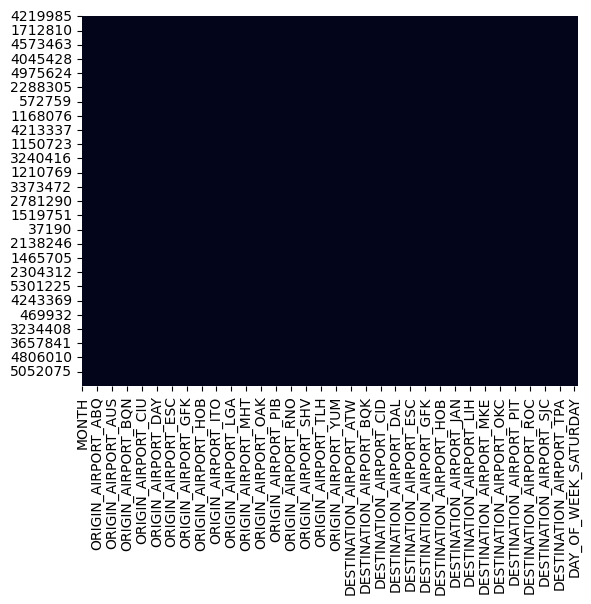

In [30]:
sns.heatmap(data.isnull(), cbar = False)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.6, random_state = 42)
print(x.shape, X_train.shape, X_test.shape)

(98120, 2) (39248, 2) (58872, 2)


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

In [36]:
model = LogisticRegression
model.fit(x,y)

AttributeError: 'DataFrame' object has no attribute '_validate_params'